In [53]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import re

import scienceplots
plt.style.use(['science','nature','no-latex','vibrant'])

#Import personal functions
import sys
#sys.path.append("C:/Users/Olivi/OneDrive - TU Eindhoven/Soft robotic matter/GitHub/Thermal_Soft_Robotics/Functions")
sys.path.append("//sun/overvelde/group-folder/PROJECTS/Thermal_soft_robotics_Olivier/Git/Thermal_Soft_Robotics/Functions")
import FluidicSetupFunctions
from save_plot_func import save_plot

In [65]:
Location = r"\\sun\overvelde\group-folder\PROJECTS\Thermal_soft_robotics_Olivier\Git\Thermal_Soft_Robotics\Thermal_actuation\Experimental\Fluidic\Oven"
Foldernames = ["//Data"]

data = FluidicSetupFunctions.LoadData(Foldernames = Foldernames,Location=Location)

Loading... Folder 1 of 1, Sample 1 of 4
Loading... Folder 1 of 1, Sample 2 of 4
Loading... Folder 1 of 1, Sample 3 of 4
Loading... Folder 1 of 1, Sample 4 of 4


In [52]:
data[1]

{'Samplerate': [1000, 1000, 1000, 1000, 1000],
 'Samplename': ['1L_no_novec_T50',
  '1L_825mg_novec_T50',
  '1L_825mg_760mg_novec_T50',
  '1L_825mg_760mg_800mg_novec_T50',
  '1L_825mg_760mg_800mg_novec_T50'],
 'Offset': [{'SSCDP15-3': 2.502590555555556},
  {'SSCDP15-3': 2.5382689999999997},
  {'SSCDP15-3': 2.623934444444445},
  {'SSCDP15-3': 4.664160111111111},
  {'SSCDP15-3': 2.5026856666666664}]}

Text(0.5, 0, 'Time [$s$]')

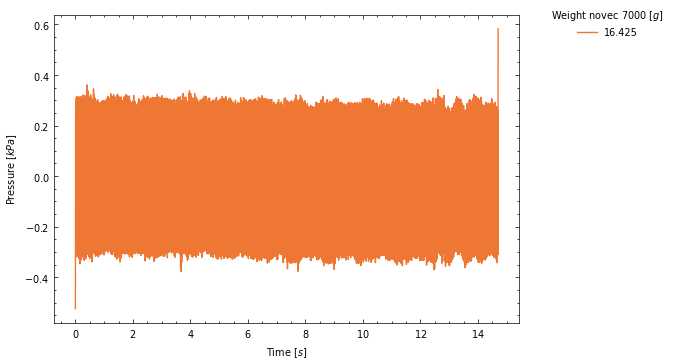

In [64]:
plt.figure(figsize=(6,4))

for i in range(0,len(data[0])):  
    P = data[0][i]['SSCDP15-3']
    t = data[0][i]['Time']
  

    mg_values = re.findall(r'\d+(?=mg)', data[1]['Samplename'][i])

    # Convert each found value to integer and sum them up
    label = sum(int(value) for value in mg_values)/1000
    if i==3:
        plt.plot(t,P/1000,label=label)
    

plt.legend(bbox_to_anchor=(1.05, 1.05), loc='upper left', title='Weight novec 7000 [$g$]')
plt.ylabel('Pressure [$kPa$]')
plt.xlabel('Time [$s$]')

0
index =  2166856
1
No sharp change detected
2
index =  2897892
3
index =  1555504


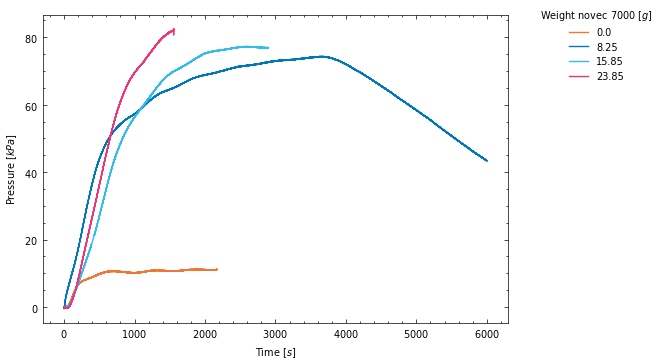

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'data' is already defined in your context

plt.figure(figsize=(6, 4))

for i in range(0, len(data[0])):  
    diff = np.diff(data[0][i]['SSCDP15-3'])
    print(i)
    
    threshold = 1000
    indices = np.where(abs(diff) > threshold)[0]

    if len(indices) > 0:  # Check if the array is not empty
        index = indices[0]
        print('index = ', index)
        P = data[0][i]['SSCDP15-3'][0:index]
        t = data[0][i]['Time'][0:index]
    else:
        # Handle the case where no sharp change is detected
        # For example, use the entire data series
        index = -1
        print('No sharp change detected')
        P = data[0][i]['SSCDP15-3']
        t = data[0][i]['Time']

    mg_values = re.findall(r'\d+(?=mg)', data[1]['Samplename'][i])

    # Convert each found value to integer and sum them up
    label = sum(int(value) for value in mg_values)/1000
    plt.plot(t, P/1000, label=label)


plt.legend(bbox_to_anchor=(1.05, 1.05), loc='upper left', title='Weight novec 7000 [$g$]')
plt.ylabel('Pressure [$kPa$]')
plt.xlabel('Time [$s$]')
plt.show()


In [19]:
xlim

6000.2